In [1]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, model_selection
from matplotlib import pyplot as plt

from sklearn.metrics import f1_score

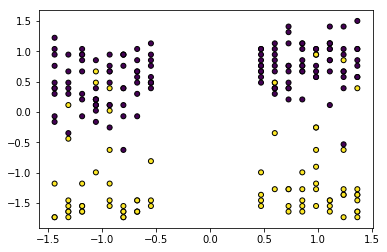

In [2]:
import numpy as np
data = read_csv('geyser.csv').sample(frac=1)

# .sample shuffles data, making it easier to split the data set

def get_val(s):
    if s == 'P':
        return 1
    else :
        return -1

Y = np.asarray([get_val(val) for val in list(data['class'])])

X = np.asarray(list(zip(list(data['x']), list(data['y']))))

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

n = len(X)//4 *3
X_train, X_test, Y_train, Y_test = X[:n], X[n:], Y[:n], Y[n:]

plt.scatter(X[:, 0],X[:, 1], c=Y, s=25, edgecolor='k')


In [3]:
from sklearn import datasets, neighbors, linear_model, naive_bayes
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def plot_classif_result(X,y,clf,title):
    # cf: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    # color maps:
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    
    
    h=0.1 # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title);

In [4]:
from sklearn import datasets, model_selection, preprocessing, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize

%matplotlib inline

def plot_classif_result_SVM(X,y,clf,title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    
    cmap2 = ListedColormap(['#FF8888', '#FFAAAA', '#AAFFAA', '#88FF88'])  
    
    h=0.01 # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Zdf = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Zdfbin = (np.abs(Zdf)<=1)   # 0 if inside margin,  1 if outside 
    Color=np.zeros(Z.shape)  # colors for each region 
    for i in range(len(Z)):
        if (Z[i]):
            if Zdfbin[i]: Color[i]=2
            else: Color[i]=3
        else:
            if Zdfbin[i]: Color[i]=1 
            else: Color[i]=0
                
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Color = Color.reshape(xx.shape)    
    plt.figure(figsize=[12,6])
    plt.pcolormesh(xx, yy, Color, cmap=cmap2)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    # Plot the support vectors:
    plt.scatter(X[clf.support_, 0], X[clf.support_, 1], c=y[clf.support_], cmap=cmap_bold,edgecolor='k',s=80, marker='*')    
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show();

The f1 score is :  0.9090909090909091
The coefficient for the regression are :  [ 0.0539689  -0.79230695]


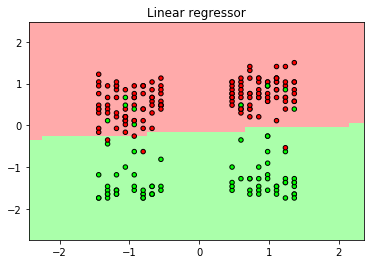

In [5]:
# first classifier : linear regression

clf = linear_model.LinearRegression().fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

for i in range(len(Y_predict)):
    if Y_predict[i] > 0:
        Y_predict[i] = 1
    else : 
        Y_predict[i] = -1

plot_classif_result(X, Y, clf, "Linear regressor")

print("The f1 score is : ", f1_score(Y_test, Y_predict))

print("The coefficient for the regression are : ", clf.coef_ )


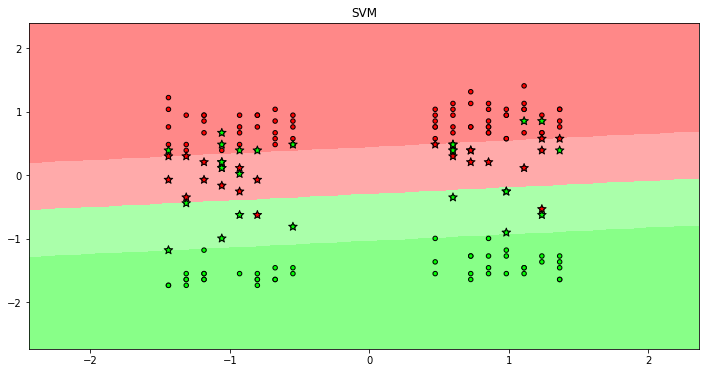

The f1 score is :  0.9090909090909091


In [6]:
# second classifier : svm

for i in range(len(Y)):
    if Y[i] == -1:
        Y[i] = 0

clf = svm.SVC(C=0.81, gamma='scale', kernel = 'linear').fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

plot_classif_result_SVM(X_train, Y_train, clf, "SVM")

print("The f1 score is : ", f1_score(Y_test, Y_predict))

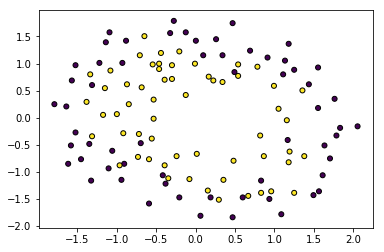

In [28]:
data = read_csv('chips.csv').sample(frac=1)

Y = np.asarray([get_val(val) for val in list(data['class'])])
X = np.asarray(list(zip(list(data['x']), list(data['y']))))

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

n = len(X)//4 * 2
X_train, X_test, Y_train, Y_test = X[:n], X[n:], Y[:n], Y[n:]

plt.scatter(X[:, 0],X[:, 1], c=Y, s=25, edgecolor='k')

The f1 score is :  0.53125
The coefficient for the regression are :  [-0.17995259  0.02422793]


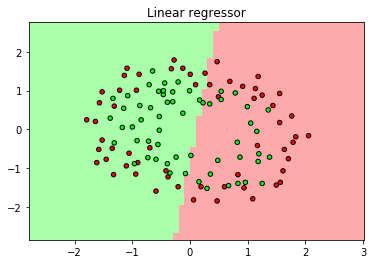

In [29]:
clf = linear_model.LinearRegression().fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

for i in range(len(Y_predict)):
    if Y_predict[i] > 0:
        Y_predict[i] = 1
    else : 
        Y_predict[i] = -1

plot_classif_result(X, Y, clf, "Linear regressor")

print("The f1 score is : ", f1_score(Y_test, Y_predict))

print("The coefficient for the regression are : ", clf.coef_ )

first case : data linearly separable, working nicely.
second one : nop

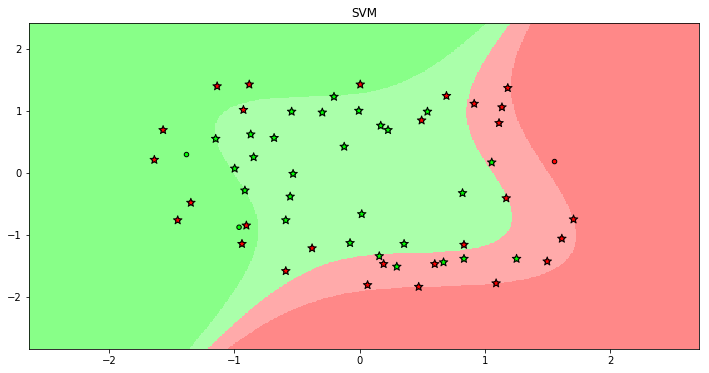

0.6575342465753425


In [30]:
for i in range(len(Y)):
    if Y[i] == -1:
        Y[i] = 0

clf = svm.SVC(C=10, gamma='scale', kernel = 'poly').fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

plot_classif_result_SVM(X_train, Y_train, clf, "SVM")

print(f1_score(Y_test, Y_predict))  

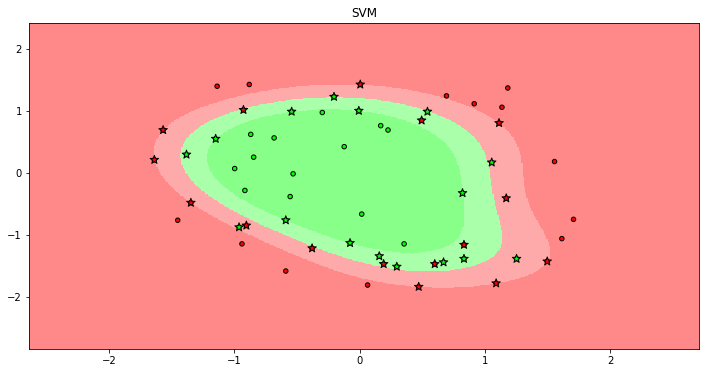

The f1 score is :  0.7058823529411765


In [31]:
clf = svm.SVC(C=12, gamma='scale', kernel = 'rbf').fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

plot_classif_result_SVM(X_train, Y_train, clf, "SVM")

print("The f1 score is : ", f1_score(Y_test, Y_predict))

C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Meilleur estimateur trouvé:
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03162277660168379,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Meilleurs paramètres:
{'C': 100.0, 'gamma': 0.03162277660168379}


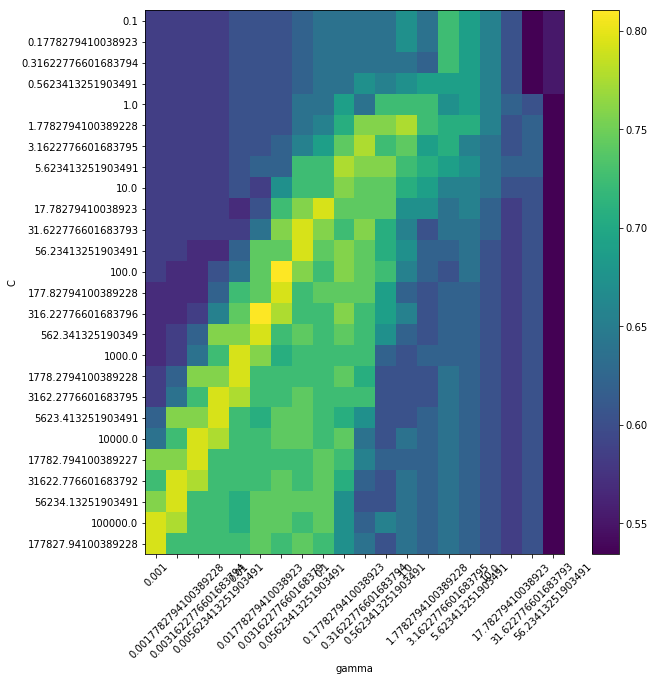

In [32]:
gamma_range=10**(np.arange(-3.,2.,.25))
C_range=10**(np.arange(-1.,5.5,.25)) 
parameters = { 'gamma': gamma_range, 'C':C_range }
SVM = svm.SVC(kernel='rbf')
gridsearch=model_selection.GridSearchCV(SVM, parameters)
gridsearch.fit(X_train,Y_train)
print("Meilleur estimateur trouvé:")
print(gridsearch.best_estimator_)
print("Meilleurs paramètres:")
print(gridsearch.best_params_)

scores = gridsearch.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
plt.figure(figsize=[10,10])
plt.imshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.colorbar()
plt.show();

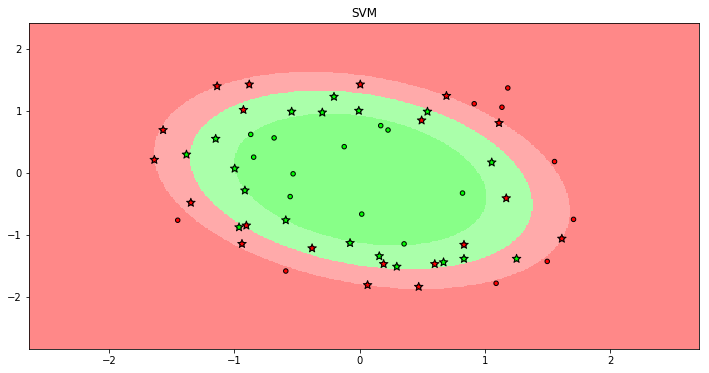

The f1 score is :  0.8


In [33]:
clf = svm.SVC(C=100, gamma=0.03, kernel = 'rbf').fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

plot_classif_result_SVM(X_train, Y_train, clf, "SVM")

print("The f1 score is : ", f1_score(Y_test, Y_predict))